# Аналитика мобильного приложения

**ОПИСАНИЕ ПРОЕКТА:**

**Необходимо проанализировать как изменилось поведение пользователей мобильного приложения стартапа по продаже продуктов питания в двух контрольных и одной экспериментальной группе после изменения шрифтов во всем приложении**

**ОПИСАНИЕ ДАННЫХ:**

**Файл с данными logs.csv**

<br>**EventName** — ***название события;***
<br>**DeviceIDHash** — ***уникальный идентификатор пользователя;***
<br>**EventTimestamp** — ***время события;***
<br>**ExpId** — ***номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная;***

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Чтение-файла-с-данными-и-изучение-общей-информации" data-toc-modified-id="Чтение-файла-с-данными-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Чтение файла с данными и изучение общей информации</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-столбцов" data-toc-modified-id="Обработка-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка столбцов</a></span></li><li><span><a href="#Обработка-дубликатов-и-типов-данных" data-toc-modified-id="Обработка-дубликатов-и-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка дубликатов и типов данных</a></span></li><li><span><a href="#Добавдение-столбца-с-датой" data-toc-modified-id="Добавдение-столбца-с-датой-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Добавдение столбца с датой</a></span></li></ul></li><li><span><a href="#Изучение-и-проверка-данных" data-toc-modified-id="Изучение-и-проверка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение и проверка данных</a></span><ul class="toc-item"><li><span><a href="#Количество-событий,-пользователей,-среднее-число-событий-на-пользователя" data-toc-modified-id="Количество-событий,-пользователей,-среднее-число-событий-на-пользователя-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Количество событий, пользователей, среднее число событий на пользователя</a></span></li><li><span><a href="#Период-данных" data-toc-modified-id="Период-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Период данных</a></span></li><li><span><a href="#Процент-потерь-в-данных-после-актуализации-периода" data-toc-modified-id="Процент-потерь-в-данных-после-актуализации-периода-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Процент потерь в данных после актуализации периода</a></span></li><li><span><a href="#Пользователи-эксперементальных-групп" data-toc-modified-id="Пользователи-эксперементальных-групп-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Пользователи эксперементальных групп</a></span></li></ul></li><li><span><a href="#Изучение-воронки-событий" data-toc-modified-id="Изучение-воронки-событий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Изучение воронки событий</a></span><ul class="toc-item"><li><span><a href="#Частотность-событий-в-логах" data-toc-modified-id="Частотность-событий-в-логах-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Частотность событий в логах</a></span></li><li><span><a href="#Количество-пользователей-совершивших-событие" data-toc-modified-id="Количество-пользователей-совершивших-событие-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Количество пользователей совершивших событие</a></span></li><li><span><a href="#Пользовательская-воронка" data-toc-modified-id="Пользовательская-воронка-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Пользовательская воронка</a></span></li></ul></li><li><span><a href="#Анализ-результатов-эксперимента" data-toc-modified-id="Анализ-результатов-эксперимента-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ результатов эксперимента</a></span><ul class="toc-item"><li><span><a href="#Количество-пользователей-в-экспериментальных-группах" data-toc-modified-id="Количество-пользователей-в-экспериментальных-группах-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Количество пользователей в экспериментальных группах</a></span></li><li><span><a href="#Группы-для-АА-эксперимента" data-toc-modified-id="Группы-для-АА-эксперимента-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Группы для АА эксперимента</a></span></li><li><span><a href="#Cтатистический-тест-для-АА-групп" data-toc-modified-id="Cтатистический-тест-для-АА-групп-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Cтатистический тест для АА групп</a></span></li><li><span><a href="#Статистический-тест-для-AB-групп" data-toc-modified-id="Статистический-тест-для-AB-групп-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Статистический тест для AB групп</a></span></li></ul></li></ul></div>

In [53]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from plotly import graph_objects as go
import numpy as np
import datetime as dt
import scipy.stats as st
from scipy import stats
import math as mth

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_style('darkgrid')
pd.set_option('display.max_colwidth', 255)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 100)
cm = sns.light_palette("brown", as_cmap=True)

## Чтение файла с данными и изучение общей информации

In [54]:
#Чтение файлйлов
df = pd.read_csv('logs_exp.csv', sep='\t')

In [55]:
# Функция просмотра датасетов
def datalook (dataset):
    display(dataset.info())
    display(dataset.head())
    display(dataset.describe())
    display(dataset.describe(include=[object]))
    print('Количество полных дубликатов:', dataset.duplicated().sum())
    return

In [56]:
# Оценка таблицы
datalook(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


,DeviceIDHash,EventTimestamp,ExpId
count,244126.00,244126.00,244126.00
mean,4627568124591259648.00,1564913915.84,247.02
std,2642424998963961856.00,177134.32,0.82
min,6888746892508752.00,1564029816.00,246.00
25%,2372212476992240640.00,1564756580.25,246.00
50%,4623191541214045184.00,1564919395.00,247.00
75%,6932517045703054336.00,1565074511.00,248.00
max,9222603179720523776.00,1565212517.00,248.00


,EventName
count,244126
unique,5
top,MainScreenAppear
freq,119205


Количество полных дубликатов: 413


**Необходимо поменять формат EventTimestamp на формат даты, привести названия столбцов к нижнему регистру, обработать дубликаты.**

## Подготовка данных

### Обработка столбцов

In [57]:
# Замена названий столбцов
df.rename(
    columns = {
        'EventName':'event_name', 'DeviceIDHash':'user_id', 'EventTimestamp':'event_time', 'ExpId':'exp_id'}, inplace=True)

In [58]:
df.sample()

,event_name,user_id,event_time,exp_id
223221,MainScreenAppear,4431142023936154775,1565172508,246


### Обработка дубликатов и типов данных

In [59]:
# Удаление полных дубликатов
df = df.drop_duplicates().reset_index(drop=True)

In [60]:
# Изменение формата данных event_time на формат даты
df.event_time = pd.to_datetime(df['event_time'], unit='s')

In [61]:
df.sample(3)

,event_name,user_id,event_time,exp_id
173501,MainScreenAppear,1618772384609580447,2019-08-05 19:18:05,246
195940,PaymentScreenSuccessful,6613527411922640441,2019-08-06 13:49:38,246
76889,MainScreenAppear,5122452238037348165,2019-08-03 05:38:18,248


### Добавдение столбца с датой

In [62]:
# Столбец с днем события
df['date'] = df['event_time'].astype('datetime64[D]')

In [63]:
df.sample(3)

,event_name,user_id,event_time,exp_id,date
221291,MainScreenAppear,967030565535610279,2019-08-07 09:23:31,248,2019-08-07
111386,CartScreenAppear,5416764107181797491,2019-08-04 06:38:44,248,2019-08-04
166071,PaymentScreenSuccessful,6613527411922640441,2019-08-05 16:01:08,246,2019-08-05


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 5 columns):
event_name    243713 non-null object
user_id       243713 non-null int64
event_time    243713 non-null datetime64[ns]
exp_id        243713 non-null int64
date          243713 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB


**Обработаны названия столбцов, удалены дубли, event_time приведен в формат даты, добавлен столбец с датой**

## Изучение и проверка данных

### Количество событий, пользователей, среднее число событий на пользователя

In [65]:
print('Всего событий %d, типов событий %d.' % (df.shape[0], df['event_name'].nunique()))
print('Всего пользователей в логе %d.' % (df['user_id'].nunique()))
print('В среднем событий на пользователя %d.' % (df.shape[0] / df['user_id'].nunique()))

Всего событий 243713, типов событий 5.
Всего пользователей в логе 7551.
В среднем событий на пользователя 32.


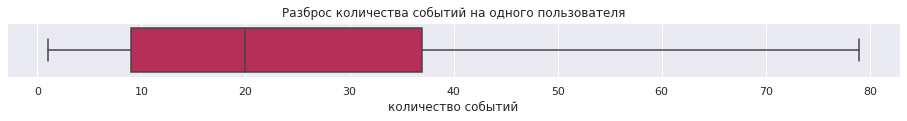

In [66]:
plt.figure(figsize=(16, 1))
sns.boxplot(df.groupby('user_id')['event_name'].count(), showfliers=False, palette="rocket_r")
plt.title('Разброс количества событий на одного пользователя')
plt.xlabel('количество событий')
plt.show()

**Медианное значение количества событий на пользователя 20, среднее 32, что свидетельствует о наличии пользователей поучавствоващих в очень большом количестве событий**

### Период данных

In [67]:
# Диапазон данных
print('От %s до %s.' % (df['date'].min(), df['date'].max()))

От 2019-07-25 00:00:00 до 2019-08-07 00:00:00.


In [68]:
# Определение временного периода данных
time_bounds = df.groupby('date').agg({'event_name': 'count'}).reset_index()
time_bounds.columns = ['date', 'event_qty']
time_bounds['date'] = time_bounds['date'].dt.strftime('%Y-%m-%d')

In [69]:
# Динамика временного периода данных
time_bounds['daily_pct'] = round((time_bounds['event_qty'] / time_bounds['event_qty'].sum() * 100),2)
time_bounds['cum_pct'] = time_bounds['daily_pct'].cumsum()
time_bounds.style.background_gradient(cmap=cm)

,date,event_qty,daily_pct,cum_pct
0,2019-07-25,9,0,0
1,2019-07-26,31,0.01,0.01
2,2019-07-27,55,0.02,0.03
3,2019-07-28,105,0.04,0.07
4,2019-07-29,184,0.08,0.15
5,2019-07-30,412,0.17,0.32
6,2019-07-31,2030,0.83,1.15
7,2019-08-01,36141,14.83,15.98
8,2019-08-02,35554,14.59,30.57
9,2019-08-03,33282,13.66,44.23


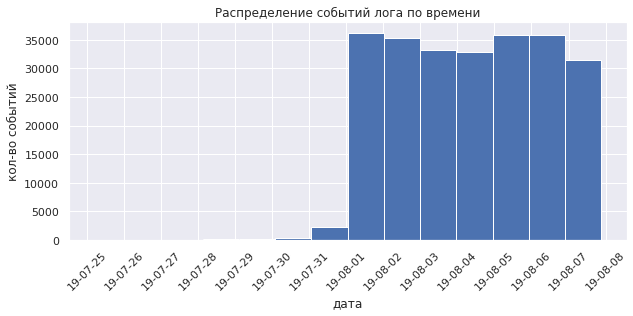

In [70]:
# Гистограмма количества данных во временном периоде
fig, ax = plt.subplots(figsize=(10,4))
df['event_time'].hist(bins=14)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.xticks(rotation=45)
plt.title('Распределение событий лога по времени')
plt.xlabel('дата')
plt.ylabel('кол-во событий')
plt.show()

**Накопленный процент количества событий за июль всего 1.15, наиболее полные данные - за вторую неделю с 1 по 7 августа включительно**

### Процент потерь в данных после актуализации периода

In [71]:
# Срез позже 31 июля
df_actual = df.query('date > "2019-07-31"')

In [72]:
# Показатели потерь в данных
losts = pd.DataFrame(
    {'lost_data':['события', 'типы событий', 'пользователи'],
     '%':[round(100 - ((df_actual.shape[0] / df.shape[0])*100),2),
         round(100 - ((df_actual['event_name'].nunique()) / (df['event_name'].nunique())*100),2),
    round(100 - ((df_actual['user_id'].nunique() / df['user_id'].nunique())*100),2)]})
losts.style.background_gradient(cmap=cm)

,lost_data,%
0,события,1.16
1,типы событий,0
2,пользователи,0.23


In [73]:
# Показатели потерь в данных
losts = pd.DataFrame(
    {'lost_data':['события', 'типы событий', 'пользователи'],
     'total_qty':[df.shape[0], df['event_name'].nunique(), df['user_id'].nunique()],
    'actual_qty':[df_actual.shape[0], df_actual['event_name'].nunique(), df_actual['user_id'].nunique()],
    'lost_%':[round(100 - ((df_actual.shape[0] / df.shape[0])*100),2),
             round(100 - ((df_actual['event_name'].nunique()) / (df['event_name'].nunique())*100),2),
             round(100 - ((df_actual['user_id'].nunique() / df['user_id'].nunique())*100),2)]})
losts.style.background_gradient(cmap=cm)

,lost_data,total_qty,actual_qty,lost_%
0,события,243713,240887,1.16
1,типы событий,5,5,0
2,пользователи,7551,7534,0.23


**Процент потерянных пользователей и количества событий незначителен.**

### Пользователи эксперементальных групп

In [74]:
# Пользователи сгруппированные по экспериментам
users_by_exp = df_actual.groupby('exp_id').agg({'user_id': 'nunique'}).reset_index()
users_by_exp.style.background_gradient(cmap=cm)

,exp_id,user_id
0,246,2484
1,247,2513
2,248,2537


In [75]:
# Количество пользователей в актуализированном датафрейме
df_actual.groupby('exp_id')['user_id'].nunique().sum()

7534

**Есть все три группы, количество уникальных пользователей сопадает  с количеством пользователей, пересечений нет.**

## Изучение воронки событий

### Частотность событий в логах

In [76]:
events_qty = df_actual['event_name'].value_counts().reset_index()
events_qty.columns = ['event_name', 'event_qty']
events_qty.style.background_gradient(cmap=cm)

,event_name,event_qty
0,MainScreenAppear,117328
1,OffersScreenAppear,46333
2,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


### Количество пользователей совершивших событие

In [77]:
user_funnel = df_actual.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame().reset_index()
user_funnel.columns = ['event_name', 'user_qty']
user_funnel['user_%'] = round((user_funnel['user_qty'] / df['user_id'].nunique() * 100),2)
user_funnel.style.background_gradient(cmap=cm)

,event_name,user_qty,user_%
0,MainScreenAppear,7419,98.25
1,OffersScreenAppear,4593,60.83
2,CartScreenAppear,3734,49.45
3,PaymentScreenSuccessful,3539,46.87
4,Tutorial,840,11.12


**Customer Journey Map:**
<br>***- Главный экран***
<br>***- Экран с товаром***
<br>***- Корзина с товаром***
<br>***- Успешная оплата***

<br>**Очевидно что Tutorial, т.е. ознакомление с приложением можно исключить, как малозначительное действие не влияющее на результат.**

In [78]:
# Исключение действия Tutorial
user_funnel = user_funnel.query('event_name != "Tutorial"')

### Пользовательская воронка

In [79]:
# Воронка действий
events = user_funnel['event_name']
users = user_funnel['user_qty']
fig = go.Figure()
fig = go.Figure(go.Funnel(
    y = events,
    x = users,
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.85,
    marker = {'color': ['#800000','#CD853F','#DEB887', '#FFDEAD']}))
fig.update_layout(
    title={
        'text': "Воронка действий пользователей",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**38% Пользвателей попав на главный экран, прекращают взаимодействие с приложением, не доходят до экрана с товаром. До успешной покупки доходят 48% пользователей попавших на главный экран приложения. 95% пользователей положивших товар в корзину успешно его оплаичают. Самый слабый этап - из главного экрана перейти к товарам, самый сильный этап - оплата положенных в корзину товаров.**

## Анализ результатов эксперимента

### Количество пользователей в экспериментальных группах

In [80]:
# Группировка уникальных пользователей по группе
group_users = df_actual.groupby('exp_id')['user_id'].nunique().to_frame().reset_index()
group_users.style.background_gradient(cmap=cm)

,exp_id,user_id
0,246,2484
1,247,2513
2,248,2537


### Группы для АА эксперимента

In [81]:
group_users['user_id'].iloc[1:2].sum()

2513

In [82]:
# Группировка уникальных пользователей группы 246 по событиям
funnel_246 = df_actual.query(
    'exp_id == 246 and event_name != "Tutorial"').groupby(
    'event_name')['user_id'].nunique().sort_values(ascending=False).to_frame(
                    ).reset_index().rename(columns={'user_id': 'users_qty'})
funnel_246['user_share'] = funnel_246['users_qty'] / group_users['user_id'].iloc[0:1].sum()
funnel_246.style.background_gradient(cmap=cm)

,event_name,users_qty,user_share
0,MainScreenAppear,2450,0.986312
1,OffersScreenAppear,1542,0.620773
2,CartScreenAppear,1266,0.509662
3,PaymentScreenSuccessful,1200,0.483092


In [83]:
# Группировка уникальных пользователей группы 247 по событиям
funnel_247 = df_actual.query(
    'exp_id == 247 and event_name != "Tutorial"').groupby(
    'event_name')['user_id'].nunique().sort_values(ascending=False).to_frame(
                    ).reset_index().rename(columns={'user_id': 'users_qty'})
funnel_247['user_share'] = funnel_247['users_qty'] / group_users['user_id'].iloc[1:2].sum()
funnel_247.style.background_gradient(cmap=cm)

,event_name,users_qty,user_share
0,MainScreenAppear,2476,0.985277
1,OffersScreenAppear,1520,0.604855
2,CartScreenAppear,1238,0.492638
3,PaymentScreenSuccessful,1158,0.460804


In [84]:
# Группировка уникальных пользователей группы 248 по событиям
funnel_248 = df_actual.query(
    'exp_id == 248 and event_name != "Tutorial"').groupby(
    'event_name')['user_id'].nunique().sort_values(ascending=False).to_frame(
                    ).reset_index().rename(columns={'user_id': 'users_qty'})
funnel_248['user_share'] = funnel_248['users_qty'] / group_users['user_id'].iloc[2:3].sum()
funnel_248.style.background_gradient(cmap=cm)

,event_name,users_qty,user_share
0,MainScreenAppear,2493,0.982657
1,OffersScreenAppear,1531,0.603469
2,CartScreenAppear,1230,0.484825
3,PaymentScreenSuccessful,1181,0.46551


**Количество пользователей и их доли по каждому событию имеют слабые различия между группами**

In [85]:
# Отношение между двумя контрольными группами
print('Процент разницы между количеством пользователей в контрольных группах',round(100 - (
    funnel_247['users_qty'].sum() / funnel_246['users_qty'].sum() * 100),2))

Процент разницы между количеством пользователей в контрольных группах 1.02


**Количество пользователей различается в двух контрольных группах на 1%, можно считать это довольно большим процентом но допустимым**

In [86]:
# Разницы между двумя контрольными группами по каждому событию
group_difference = round((funnel_247['users_qty'] / funnel_246['users_qty'] * 100),2).to_frame()
group_difference = group_difference.merge(funnel_246['event_name'], left_index=True, right_index=True)
group_difference.columns = ['247_to_246', 'event_name']
group_difference['%_diff'] = group_difference['247_to_246'] - 100
group_difference.style.background_gradient(cmap=cm)

,247_to_246,event_name,%_diff
0,101.06,MainScreenAppear,1.06
1,98.57,OffersScreenAppear,-1.43
2,97.79,CartScreenAppear,-2.21
3,96.5,PaymentScreenSuccessful,-3.5


**Если смотреть по событиям то различия чуть больше 1 %**

In [87]:
fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'exp 246',
    y = funnel_246['event_name'],
    x = funnel_246['users_qty'],
    textposition = "inside",
    textinfo = "value+percent initial+percent previous",
    marker={'color':'#CD853F'}
    ))
fig.add_trace(go.Funnel(
    name = 'exp 247',
    y = funnel_247['event_name'],
    x = funnel_247['users_qty'],
    textposition = "inside",
    textinfo = "value+percent initial+percent previous",
    marker={'color':'#DEB887'}
    ))
fig.add_trace(go.Funnel(
    name = 'exp 248',
    y = funnel_248['event_name'],
    x = funnel_248['users_qty'],
    textposition = "inside",
    textinfo = "value+percent initial+percent previous",
    marker={'color':'#FFDEAD'}
    ))
fig.update_layout(
    title={
        'text': "Воронка действий пользователей по группам",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [88]:
# Группировка групп по пользователям с числом групп более 1
df_actual.groupby('user_id')['exp_id'].nunique().reset_index().query('exp_id > 1')

,user_id,exp_id


**Существенных различий между двумя контрольными группами не наблюдается, разница в количестве пользователей мала, пользователей попавших одновременно в две группы нет.**

### Cтатистический тест для АА групп

In [89]:
# Группировка пользователей по событиям
users_qty_by_events = df_actual.pivot_table(
    index='event_name',columns='exp_id', values='user_id', aggfunc='nunique').sort_values(246,ascending=False)
users_qty_by_events['control_group'] = users_qty_by_events[246] + users_qty_by_events[247]
users_qty_by_events.style.background_gradient(cmap=cm)

exp_id,246,247,248,control_group
event_name,,,,
MainScreenAppear,2450,2476,2493,4926
OffersScreenAppear,1542,1520,1531,3062
CartScreenAppear,1266,1238,1230,2504
PaymentScreenSuccessful,1200,1158,1181,2358
Tutorial,278,283,279,561


In [90]:
control = pd.DataFrame({'exp_id':'control_group', 'user_id':[group_users['user_id'].loc[0:1].sum()]})

In [91]:
# Количество уникальных пользователей по группам
users_by_group = group_users.append(control).set_index('exp_id')
users_by_group.style.background_gradient(cmap=cm)

,user_id
exp_id,
246,2484
247,2513
248,2537
control_group,4997


In [92]:
# Функция применения Z критерия для событий групп 246 и 247
def z_test(a_group1, a_group2, event, alpha):
    # Количество пользователей, совершивших событие в первой группе
    p1_events = users_qty_by_events.loc[event, a_group1]
    # Количество пользователей, совершивших событие во второй группе
    p2_events = users_qty_by_events.loc[event, a_group2]
    # Количество пользователей в первой группе
    p1_users = users_by_group.loc[a_group1, 'user_id']
    # число пользователей во второй группе
    p2_users = users_by_group.loc[a_group2, 'user_id']
    # Пропорция успехов в первой группе
    p1 = p1_events / p1_users
    # Пропорция успехов во второй группе
    p2 = p2_events / p2_users
    # Разница пропорций
    difference = p1 - p2
    # пропорция успехов в комбинированном датасете:
    p_combined = (p1_events + p2_events) / (p1_users + p2_users)
    # Рсчет статистики в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_users + 1 / p2_users))
    # Cтандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Тест для {} и {}, событие: {}, p-значение: {p_value:.2f}'.format(a_group1, a_group2, event, p_value=p_value))
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

**Гипотезы для AA теста**

<br>**$Ho$**  - ***доли в двух А (контрольных) группах не различаются***
<br>**$H1$**  - ***доли в двух А (контрольных) группах различаются***

<div class = "alert alert-success">
<b> Комментарии ревьюера</b>

Плюс за формулировки гипотез👍
</div>

In [93]:
for event in users_qty_by_events.index:
    z_test(246, 247, event, 0.05)
    print()

Тест для 246 и 247, событие: MainScreenAppear, p-значение: 0.76
Не получилось отвергнуть нулевую гипотезу

Тест для 246 и 247, событие: OffersScreenAppear, p-значение: 0.25
Не получилось отвергнуть нулевую гипотезу

Тест для 246 и 247, событие: CartScreenAppear, p-значение: 0.23
Не получилось отвергнуть нулевую гипотезу

Тест для 246 и 247, событие: PaymentScreenSuccessful, p-значение: 0.11
Не получилось отвергнуть нулевую гипотезу

Тест для 246 и 247, событие: Tutorial, p-значение: 0.94
Не получилось отвергнуть нулевую гипотезу



**Статистическую значимость различий между двумя контрольными группами выявить не получилось.**

### Статистический тест для AB групп

**Гипотезы для AB теста**

<br>**$Ho$**  - ***доли во первой контрольной и экспериментальной группах не различаются***
<br>**$H1$**  - ***доли во первой контрольной и экспериментальной группах различаются***

In [94]:
# Стат тест для первой контрольной груаппы и экспериментальной
for event in users_qty_by_events.index:
    z_test(246, 248, event, 0.05)
    print()

Тест для 246 и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу

Тест для 246 и 248, событие: OffersScreenAppear, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу

Тест для 246 и 248, событие: CartScreenAppear, p-значение: 0.08
Не получилось отвергнуть нулевую гипотезу

Тест для 246 и 248, событие: PaymentScreenSuccessful, p-значение: 0.21
Не получилось отвергнуть нулевую гипотезу

Тест для 246 и 248, событие: Tutorial, p-значение: 0.83
Не получилось отвергнуть нулевую гипотезу



**Гипотезы для AB теста**

<br>**$Ho$**  - ***доли во второй контрольной и экспериментальной группах не различаются***
<br>**$H1$**  - ***доли во второй контрольной и экспериментальной группах различаются***

In [95]:
# Стат тест для второй контрольной груаппы и экспериментальной
for event in users_qty_by_events.index:
    z_test(247, 248, event, 0.05)
    print()

Тест для 247 и 248, событие: MainScreenAppear, p-значение: 0.46
Не получилось отвергнуть нулевую гипотезу

Тест для 247 и 248, событие: OffersScreenAppear, p-значение: 0.92
Не получилось отвергнуть нулевую гипотезу

Тест для 247 и 248, событие: CartScreenAppear, p-значение: 0.58
Не получилось отвергнуть нулевую гипотезу

Тест для 247 и 248, событие: PaymentScreenSuccessful, p-значение: 0.74
Не получилось отвергнуть нулевую гипотезу

Тест для 247 и 248, событие: Tutorial, p-значение: 0.77
Не получилось отвергнуть нулевую гипотезу



**Гипотезы для AB теста**

<br>**$Ho$**  - ***доли в контрольной и экспериментальной группах не различаются***
<br>**$H1$**  - ***доли в контрольной и экспериментальной группах различаются***

In [96]:
# Стат тест для объединенной контрольной и экспериментальной групп
for event in users_qty_by_events.index:
    z_test('control_group', 248, event, 0.05)
    print()

Тест для control_group и 248, событие: MainScreenAppear, p-значение: 0.29
Не получилось отвергнуть нулевую гипотезу

Тест для control_group и 248, событие: OffersScreenAppear, p-значение: 0.43
Не получилось отвергнуть нулевую гипотезу

Тест для control_group и 248, событие: CartScreenAppear, p-значение: 0.18
Не получилось отвергнуть нулевую гипотезу

Тест для control_group и 248, событие: PaymentScreenSuccessful, p-значение: 0.60
Не получилось отвергнуть нулевую гипотезу

Тест для control_group и 248, событие: Tutorial, p-значение: 0.76
Не получилось отвергнуть нулевую гипотезу



**AB тест также не смог выявить статистическую значимость различий долей в контрольной и экспериментальной группах**

**Ни один тест не показал статистически значимую разницу. Но поскольку был проведен множественный тест на выборках из одного и того же набора данных, значит с каждой проверкой растет вероятность ошибки первого рода, для понимания нужно ли корректировать p-value можно сделать поправку на мно́жественную проверку гипотез методом Шидака-Холма.**

In [97]:
# Лист значений p-value
plist = [0.76, 0.25, 0.23, 0.11, 0.94, 0.29, 0.21, 0.08, 0.21, 0.83, 0.46, 0.92, 0.58, 0.74, 0.77, 0.29, 0.43, 0.18, 0.60, 0.76]

In [98]:
from statsmodels.stats.multitest import multipletests
reject, p_value_corrected, sidak_corr, bonf_corr = multipletests(plist, alpha=0.05, method='holm-sidak')

In [99]:
# Лист проверки гипотез
reject.tolist()

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [100]:
# Лист скорректированных p-value
p_value_corrected.tolist()

[0.99991968189824,
 0.9821820519864559,
 0.9818172087853407,
 0.8907528474392303,
 0.99991968189824,
 0.988349125254145,
 0.9818172087853407,
 0.8113066708372033,
 0.9818172087853407,
 0.99991968189824,
 0.9979364100106957,
 0.99991968189824,
 0.9995933286161506,
 0.99991968189824,
 0.99991968189824,
 0.988349125254145,
 0.9979364100106957,
 0.9719036863204473,
 0.9995933286161506,
 0.99991968189824]

In [101]:
# Поправка Шидака
sidak_corr

0.0025613787765302876

In [102]:
# Поправка Бонферрони
bonf_corr

0.0025

**Все гипотезы проверены правильно. При проведении пяти АА и пятнадцати АB тестов с уровнем значимости 5% ни один не показал статистической значимости, полученные p-value достаточно велики при выбранном уровне значимости. Корректировать p-value в связи с проведением мультитестов также нет необходимости.**

**ОБЩИЙ ВЫВОД**

<br>**Больше всего пользователей теряется после входа на главный экран приложения, до стадии выбора товара доходит лишь 62% пользователей.**

<br>**До успешной оплаты доходят 48% пользователей зашедших в приложение.**

<br>**Статзначимых различий между двумя контрольными группами не удалось обнаружить - это значит, что пользователи относятся к той или иной группе корректным, случайным образом.**

<br>**Не удалось выявть также статистически значимых различий в поведении пользователей между контрольной и экспериментальной группами, значит изменение шрифтов во всем приложении не повлияло на конверсии событий и не привело к их улучшению.**

<br>**В качестве рекомендации можно предложить обратить более детальное внимание на потерю пользователей между входом на главный экран и выбором товара.**